# Data Handling (I/O)
## PyIU Python Workshop

Authors: Brandon Radzom, Robert Howard
Last Modified: 10/15/2024

## Modules

- `numpy` (commonly abbreviated `np` when importing) is a go-to module for all things data handling. File input/output, manipulating arrays, basic (and not-so-basic) mathematical functions, `numpy` does it all.
- `pandas` (commonly abbreviated `pd` when importing) is better than `numpy` for complex operations with tables. `numpy` works well enough for simple applications, and it's convenient having so many features in a single module, but if you need to do something with a table and can't find a `numpy` function for it, `pandas` is the next place to look. It also has ways to display tables in Jupyter Notebooks professionally.
- `matplotlib` (commonly abbreviated `plt` when importing) is a go-to module for all things plotting. It gives you control over every aspect of the plot you can imagine, from simple features like data plotting, axis labels, plot titles, and legends, to more detailed features like subplots, inset plots, axis label formatting, colormaps, and so much more.
    - The sublibrary you want to import, specifically, is `matplotlib.pyplot`. The more general `matplotlib` contains all kinds of fantastical and scary features that we don't need for simple plotting.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## File Input/Output

- `np.loadtxt(filename)` is the quickest and easiest way to get your data in a workable format. It's smarter than the default Python `with open(filename) as f` statement in a number of ways, most helpfully that it reads in numbers as floats instead of strings by default.
    - Similarly, `np.savetxt(filename, array)` lets you write a `numpy` array to an output file.
- `pd.read_csv(filename)` is a better option for large tables with lots of columns. It allows you to name the columns, which makes them much easier to keep track of than having to remember which index goes with which column. And, as mentioned above, `pandas` has all kinds of functionality for doing complicated, data-science-related things with tables.

In [ ]:
phot = np.loadtxt('phot_data.txt')
salt = np.loadtxt('salt_data.txt')
print(phot[:5])
print(salt[:5])

[[2.45782271e+06 1.60090000e+01]
 [2.45782271e+06 1.59970000e+01]
 [2.45782665e+06 1.37420000e+01]
 [2.45782665e+06 1.37360000e+01]
 [2.45782755e+06 1.33980000e+01]]
[[2.45782600e+06 1.41884452e+01]
 [2.45782650e+06 1.39032684e+01]
 [2.45782700e+06 1.36535971e+01]
 [2.45782750e+06 1.34331357e+01]
 [2.45782800e+06 1.32394456e+01]]


In [ ]:
pd_phot = pd.read_csv('phot_data.txt', sep = ' ', names = ['Julian Date', 'g Mag'])
pd_phot[:10]

,Julian Date,g Mag
0,2.457823e+06,16.009
1,2.457823e+06,15.997
2,2.457827e+06,13.742
3,2.457827e+06,13.736
4,2.457828e+06,13.398
5,2.457828e+06,13.419
6,2.457828e+06,13.384
7,2.457828e+06,13.383
8,2.457829e+06,13.079
9,2.457829e+06,13.078


## Plotting

- Time for `matplotlib`! The most basic functions you'll need are `plt.plot(x_array, y_array)`, `plt.scatter(array)`, and `plt.show()`. The effects of those functions are pretty obvious once you see them in action &mdash; the first one plots your data, and the second one displays the plot.
- Remember that we've already read in the data, but now we need to put it into a plottable form. `plt.plot()` takes a 1-D array of x values and a 1-D array of y values, but our data are stored in two 2-D arrays. To split up those 2-D arrays, we'll use the following `numpy` array syntax. Notice that the first 5 elements in each of these resulting 1-D arrays are the first five elements of each of the columns of the 2-D array `phot` from a few cells above.

In [ ]:
phot_time = phot[:,0]
phot_mag = phot[:,1]
salt_time = salt[:,0]
salt_mag = salt[:,1]
print(phot_time[:5], phot_mag[:5])

[2457822.70568 2457822.70846 2457826.64743 2457826.64895 2457827.5546 ] [16.009 15.997 13.742 13.736 13.398]


- Now we can plot the data! We'll use `plt.scatter()` for the `phot` data, since those are individual observations of a type Ia supernova's magnitude, and `plt.scatter()` will plot them as individual data points. For the best-fit curve provided by the `salt` data, we'll use `plt.plot()`, since that will produce a smooth curve.

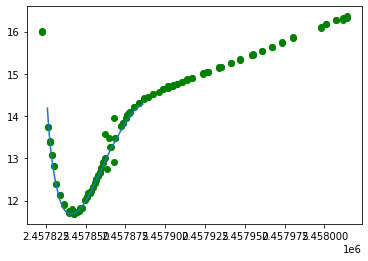

In [ ]:
plt.scatter(phot_time, phot_mag, color = 'green')
plt.plot(salt_time, salt_mag)
plt.show()

- We've made a plot! But it looks a little weird, so let's spruce it up. Axis labels (with units, where appropriate) and a title are essential elements of any professional plot. We can also subtract a common value from both time arrays, so the x-axis tick labels aren't all scrunched together.

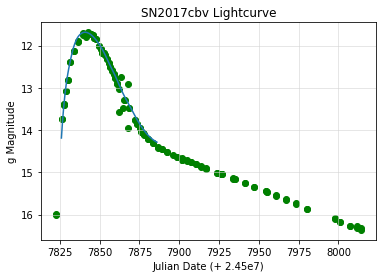

In [ ]:
t = 2450000
plt.scatter(phot_time - t, phot_mag, color = 'green')
plt.plot(salt_time - t, salt_mag)
plt.gca().invert_yaxis() # Brighter objects have lower magnitudes, so it's customary to invert axes that use magnitudes
plt.title('SN2017cbv Lightcurve')
plt.xlabel('Julian Date (+ 2.45e7)')
plt.ylabel('g Magnitude')
plt.grid(color = 'lightgray', alpha = 0.7)
plt.savefig('sn2017cbv_lc.png') # Saves the plot as a .png file
plt.show()

And that's that! For more resources, check out these documentation pages, as well as the included cheat sheets:
- Numpy: https://numpy.org/doc/stable/reference/
- Pandas: https://pandas.pydata.org/docs/reference/index.html
- Matplotlib: https://matplotlib.org/stable/api/pyplot_summary.html

The documentation can be a little dense and overwhelming if you're looking for something specific, though, so a good approach can be just to Google "[module name] [thing you want to learn more about]," and that will provide more immediately helpful results.